In [1]:
!pip install gensim --upgrade

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python39\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip install nltk --upgrade

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python39\python.exe -m pip install --upgrade pip' command.


In [3]:
!pip install pandas --upgrade

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python39\python.exe -m pip install --upgrade pip' command.


In [4]:
!pip install sklearn --upgrade

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python39\python.exe -m pip install --upgrade pip' command.


In [5]:
!pip install tensorflow --upgrade

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python39\python.exe -m pip install --upgrade pip' command.


In [6]:
!pip install textblob --upgrade

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python39\python.exe -m pip install --upgrade pip' command.


In [7]:
!pip install matplotlib --upgrade

Defaulting to user installation because normal site-packages is not writeable

You should consider upgrading via the 'c:\program files\python39\python.exe -m pip install --upgrade pip' command.


In [8]:
!pip install openpyxl --upgrade

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


In [9]:
import logging
import os
import random  # The *os* and *os.config_location* modules include many functions to interact with the file system and also the operating system.
import re  # Importing the regex library

## for word embedding
import gensim
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
#import seaborn as sns  # for data visualization
from nltk.stem import PorterStemmer
from sklearn import feature_selection, manifold, naive_bayes, pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.metrics import (accuracy_score, f1_score,
                             precision_score, recall_score)
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.utils import shuffle
## for deep learning
from tensorflow.keras import backend as K
from tensorflow.keras import layers
from tensorflow.keras import preprocessing as kprocessing
from textblob import Word

#from wordcloud import WordCloud

In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\c21106171\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\c21106171\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\c21106171\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\c21106171\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [14]:
counter = 1
data = [] #making an empty list to store the articles in the list.
category = [] #making an empty list to store the indexes of the articles in the list.
vocab_len = 50
logging.basicConfig()
logging.root.setLevel(logging.NOTSET)
logging.basicConfig(level=logging.NOTSET)

count_vectorizer = CountVectorizer(ngram_range= (1,1),min_df =5)
tfidf_unigram_vectorizer = TfidfVectorizer(sublinear_tf=True, norm='l2', min_df =3, ngram_range=(1,1), stop_words='english')
tfidf_bigram_vectorizer = TfidfVectorizer(sublinear_tf=True, norm='l2', min_df =3, ngram_range=(2,2), stop_words='english')

github_filepath = 'https://raw.githubusercontent.com/vargheseabraham07/projects/main/data.csv'

In [15]:
print('loading data from ' + github_filepath)
data = pd.read_csv(github_filepath)
         
data

loading data from https://raw.githubusercontent.com/vargheseabraham07/projects/main/data.csv


,articles,category,id
0,Ad sales boost Time Warner profit Quarterly ...,business,0
1,Dollar gains on Greenspan speech The dollar ...,business,0
2,Yukos unit buyer faces loan claim The owners...,business,0
3,High fuel prices hit BA's profits British Ai...,business,0
4,Pernod takeover talk lifts Domecq Shares in ...,business,0
...,...,...,...
2220,BT program to beat dialler scams BT is intro...,tech,4
2221,Spam e-mails tempt net shoppers Computer use...,tech,4
2222,Be careful how you code A new European direc...,tech,4
2223,US cyber security chief resigns The man maki...,tech,4


DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Users\\c21106171\\AppData\\Roaming\\Python\\Python39\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansMono-Oblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Users\\c21106171\\AppData\\Roaming\\Python\\Python39\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSerif-BoldItalic.ttf', name='DejaVu Serif', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Users\\c21106171\\AppData\\Roaming\\Python\\Python39\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSerif-Italic.ttf', name='DejaVu Serif', style='italic', variant='norm

<AxesSubplot:>

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Users\\c21106171\\AppData\\Roaming\\Python\\Python39\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansMono-Oblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Users\\c21106171\\AppData\\Roaming\\Python\\Python39\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSerif-BoldItalic.ttf', name='DejaVu Serif', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Users\\c21106171\\AppData\\Roaming\\Python\\Python39\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSerif-Italic.ttf', name='DejaVu Serif', style='italic', variant='norm

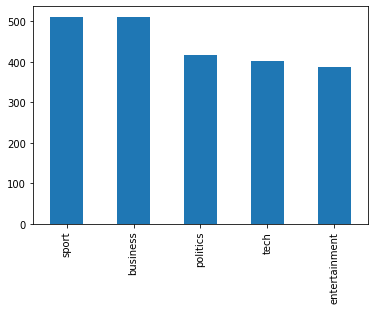

In [16]:
data['category'].value_counts().plot.bar()


In [17]:
print(data['category'].value_counts())

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64


In [18]:
#Data Preprocessing
def data_preprocessor(text, stopWords):
    #print(text)
    stopWords.append(".")
    stopWords.append(",")
    stopWords.append("--")
    stopWords.append("``")
    # here We need to ad a new columns with preprocessed, tokenized, lowercase, stemmed, lemmatized data, stopwords removed

    ## clean (convert to lowercase and remove punctuations and characters and then strip)
    processed_word = []
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    sentence_split = nltk.tokenize.sent_tokenize(text)
    for sentence in sentence_split:

        ## Tokenize (convert from string to list)
        sentence_tokens = nltk.tokenize.word_tokenize(sentence)
        for word in sentence_tokens:
            ## remove Stopwords
            if word in stopWords:
                continue;

            #lst_text = lst_text.apply(lambda stemmer: ' '.join([PorterStemmer().stem(article) for article in stemmer.split()]))
            word = PorterStemmer().stem(word)
            #lst_text = lst_text.apply(lambda x: ' '.join ([Word(myword).lemmatize() for myword in x.split()]))
            word = Word(word).lemmatize()

            processed_word.append(word)
  

    text = " ".join(processed_word)
    return text

#Pre-process Data
data['cleaned_articles'] = data['articles'].apply(lambda x: data_preprocessor(x, nltk.corpus.stopwords.words("english")))
print(data)

                                               articles  category  id  \
0      Ad sales boost Time Warner profit  Quarterly ...  business   0   
1      Dollar gains on Greenspan speech  The dollar ...  business   0   
2      Yukos unit buyer faces loan claim  The owners...  business   0   
3      High fuel prices hit BA's profits  British Ai...  business   0   
4      Pernod takeover talk lifts Domecq  Shares in ...  business   0   
...                                                 ...       ...  ..   
2220   BT program to beat dialler scams  BT is intro...      tech   4   
2221   Spam e-mails tempt net shoppers  Computer use...      tech   4   
2222   Be careful how you code  A new European direc...      tech   4   
2223   US cyber security chief resigns  The man maki...      tech   4   
2224   Losing yourself in online gaming  Online role...      tech   4   

                                       cleaned_articles  
0     ad sale boost time warner profit quarterli pro...  
1     d

In [19]:
# Train, Dev, Test Split
data = shuffle(data)

train, dev, Y_train, Y_dev = train_test_split(data, data['category'], test_size=0.20, stratify=data['category'], random_state=0)
dev, test, Y_dev, Y_test = train_test_split(dev, dev['category'], test_size=0.50, stratify=dev['category'], random_state=0)


print(train['category'].value_counts())
print(test['category'].value_counts())
print(dev['category'].value_counts())


sport            409
business         408
politics         333
tech             321
entertainment    309
Name: category, dtype: int64
sport            51
business         51
politics         42
tech             40
entertainment    39
Name: category, dtype: int64
business         51
sport            51
politics         42
tech             40
entertainment    38
Name: category, dtype: int64


<AxesSubplot:>

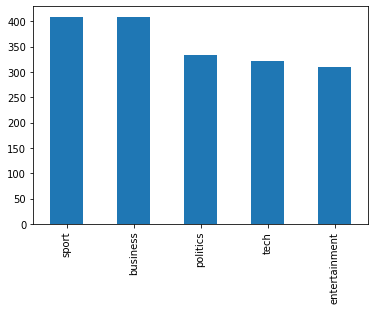

In [20]:
train['category'].value_counts().plot.bar()

<AxesSubplot:>

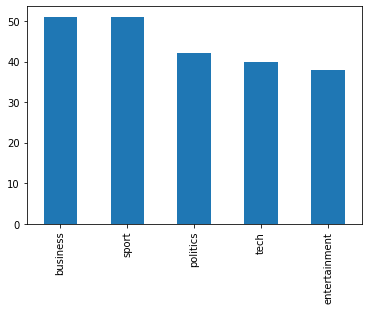

In [21]:
dev['category'].value_counts().plot.bar()

<AxesSubplot:>

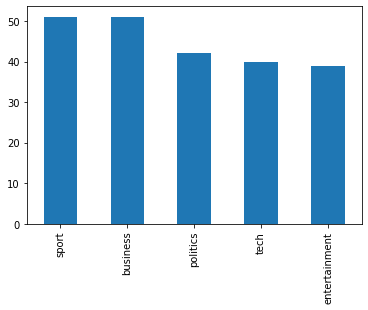

In [22]:
test['category'].value_counts().plot.bar()

In [23]:
def data_feature_engineer_with_word2vec(corpus, mode):
    
    array_length = vocab_len * 300
    embedding_features = pd.DataFrame()
    processedDocCount = 1
    feature_names = []

    ## create list of lists of unigrams
    lst_corpus = text_process(corpus)

    ## fit w2v
    word2vec = gensim.models.word2vec.Word2Vec(lst_corpus, vector_size=300, window=8, min_count=5, sg=1)
    embedding_features = extract_features(array_length, embedding_features, processedDocCount, word2vec, corpus, vocab_len, mode)

    print(type(embedding_features))
    print(embedding_features.shape)
    return embedding_features

def text_process(corpus):
    lst_corpus = []
    for string in corpus:
        lst_words = string.split()
        lst_grams = [" ".join(lst_words[i:i+1]) for i in range(0, len(lst_words), 1)]
        lst_corpus.append(lst_grams)
    return lst_corpus

def extract_features(array_length, embedding_features, processedDocCount, word2vec, corpus, vocab_len, mode):
    #for idx, key in enumerate(word2vec.wv.index_to_key):
    for document in corpus:
        words = kprocessing.text.text_to_word_sequence(document)[0:vocab_len] 
        for word in words:
            # Retrieving the vector representation of each word and 
            # appending it to the feature vector 
            feature_vector = []
            try:
                feature_vector = np.append(feature_vector, np.array(word2vec.wv[word]))
            except KeyError:
                # In the event that a word is not included in our 
                # dictionary skip that word
                pass
        # If the text has less then 20 words, fill remaining vector with zeros
        zeroes_to_add = array_length - len(feature_vector)
        feature_vector = np.append(feature_vector, np.zeros(zeroes_to_add)).reshape((1,-1))
        #feature_vector = np.append(feature_vector, document).reshape((1,-1))
            
        # Append the document feature vector to the feature table
        embedding_features = pd.concat([embedding_features, pd.DataFrame(feature_vector)])
        print("### processed " + str(processedDocCount) + " out of " + str(len(corpus.index)) + " Documents")
        processedDocCount=processedDocCount+1
    
    embedding_features = embedding_features.applymap(lambda x:x+1)
    return embedding_features


# Train Vectorization

In [24]:
def stack_vectors(*vectors):
    return np.hstack(vectors)

In [25]:
count_vector_x_train = count_vectorizer.fit_transform(train.cleaned_articles).toarray()
tfidf_unigram_x_train = tfidf_unigram_vectorizer.fit_transform(train.cleaned_articles).toarray()
tfidf_bigram_x_train = tfidf_bigram_vectorizer.fit_transform(train.cleaned_articles).toarray()
word2vec_vector_x_train = data_feature_engineer_with_word2vec(train.cleaned_articles, "train").to_numpy()

INFO:gensim.models.word2vec:collecting all words and their counts
INFO:gensim.models.word2vec:PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO:gensim.models.word2vec:collected 21874 word types from a corpus of 399080 raw words and 1780 sentences
INFO:gensim.models.word2vec:Creating a fresh vocabulary
DEBUG:gensim.utils:starting a new internal lifecycle event log for Word2Vec
INFO:gensim.utils:Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains 7270 unique words (33.235805065374414%% of original 21874, drops 14604)', 'datetime': '2022-03-24T00:47:30.755467', 'gensim': '4.1.2', 'python': '3.9.6 (tags/v3.9.6:db3ff76, Jun 28 2021, 15:26:21) [MSC v.1929 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19043-SP0', 'event': 'prepare_vocab'}
INFO:gensim.utils:Word2Vec lifecycle event {'msg': 'effective_min_count=5 leaves 374444 word corpus (93.8268016437807%% of original 399080, drops 24636)', 'datetime': '2022-03-24T00:47:30.759490', 'gensim': '4.1.2', 'python'

### processed 1 out of 1780 Documents
### processed 2 out of 1780 Documents
### processed 3 out of 1780 Documents
### processed 4 out of 1780 Documents
### processed 5 out of 1780 Documents
### processed 6 out of 1780 Documents
### processed 7 out of 1780 Documents
### processed 8 out of 1780 Documents
### processed 9 out of 1780 Documents
### processed 10 out of 1780 Documents
### processed 11 out of 1780 Documents
### processed 12 out of 1780 Documents
### processed 13 out of 1780 Documents
### processed 14 out of 1780 Documents
### processed 15 out of 1780 Documents
### processed 16 out of 1780 Documents
### processed 17 out of 1780 Documents
### processed 18 out of 1780 Documents
### processed 19 out of 1780 Documents
### processed 20 out of 1780 Documents
### processed 21 out of 1780 Documents
### processed 22 out of 1780 Documents
### processed 23 out of 1780 Documents
### processed 24 out of 1780 Documents
### processed 25 out of 1780 Documents
### processed 26 out of 1780 Docum

In [26]:
#Training Vectors----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
k=2000
dochianalysis_count = SelectKBest(chi2, k=k)
dochianalysis_tfidf_uni = SelectKBest(chi2, k=k)
dochianalysis_tfidf_bi = SelectKBest(chi2, k=k)
dochianalysis_word2vec = SelectKBest(chi2, k=k)

In [27]:
filtered_count_vector_x_train = dochianalysis_count.fit_transform(count_vector_x_train, train.category)
filtered_tfidf_unigram_x_train = dochianalysis_tfidf_uni.fit_transform(tfidf_unigram_x_train, train.category)
filtered_tfidf_bigram_x_train = dochianalysis_tfidf_bi.fit_transform(tfidf_bigram_x_train, train.category)
filtered_word2vec_vector_x_train = dochianalysis_word2vec.fit_transform(word2vec_vector_x_train, train.category)

print (" original count_vector_x_train matrix shape: "+str(count_vector_x_train.shape) + " Filtered count_vector_x_train shape is: " + str(filtered_count_vector_x_train.shape))

 original count_vector_x_train matrix shape: (1780, 6071) Filtered count_vector_x_train shape is: (1780, 2000)


In [28]:
print (" original tfidf_unigram_x_train matrix shape: "+str(tfidf_unigram_x_train.shape) + " Filtered filtered_tfidf_unigram_x_train shape is: " + str(filtered_tfidf_unigram_x_train.shape))

 original tfidf_unigram_x_train matrix shape: (1780, 8522) Filtered filtered_tfidf_unigram_x_train shape is: (1780, 2000)


In [29]:
print (" original tfidf_bigram_x_train matrix shape: "+str(tfidf_bigram_x_train.shape) + " Filtered filtered_tfidf_bigram_x_train shape is: " + str(filtered_tfidf_bigram_x_train.shape))


 original tfidf_bigram_x_train matrix shape: (1780, 14784) Filtered filtered_tfidf_bigram_x_train shape is: (1780, 2000)


In [30]:
print (" original word2vec_vector_x_train matrix shape: "+str(word2vec_vector_x_train.shape) + " Filtered filtered_word2vec_vector_x_train shape is: " + str(filtered_word2vec_vector_x_train.shape))
#print(filtered_word2vec_vector_x_train[0])

 original word2vec_vector_x_train matrix shape: (1780, 15000) Filtered filtered_word2vec_vector_x_train shape is: (1780, 2000)


In [31]:
# Combined  training Vectors
stacked_filtered_x_train = stack_vectors(filtered_count_vector_x_train, filtered_tfidf_unigram_x_train, filtered_tfidf_bigram_x_train, filtered_word2vec_vector_x_train)
print(stacked_filtered_x_train.shape)

#df_filtered_count_vector_x_train = pd.DataFrame (filtered_count_vector_x_train).to_excel(config_location+'\df_filtered_count_vector_x_train.xlsx', index=False)
#df_filtered_tfidf_unigram_x_train = pd.DataFrame (filtered_tfidf_unigram_x_train).to_excel(config_location+'\df_filtered_tfidf_unigram_x_train.xlsx', index=False)
#df_filtered_tfidf_bigram_x_train = pd.DataFrame (filtered_tfidf_bigram_x_train).to_excel(config_location+'\df_filtered_tfidf_bigram_x_train.xlsx', index=False)
#df_filtered_word2vec_vector_x_train = pd.DataFrame (filtered_word2vec_vector_x_train).to_excel(config_location+'\df_filtered_word2vec_vector_x_train.xlsx', index=False)

(1780, 8000)


# Dev Vectorization

In [32]:
#Devlopment Vectors-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
count_vector_x_dev = count_vectorizer.transform(dev.cleaned_articles).toarray()
tfidf_unigram_x_dev = tfidf_unigram_vectorizer.transform(dev.cleaned_articles).toarray()
tfidf_bigram_x_dev = tfidf_bigram_vectorizer.transform(dev.cleaned_articles).toarray()
word2vec_vector_x_dev = data_feature_engineer_with_word2vec(dev.cleaned_articles, "dev").to_numpy()

INFO:gensim.models.word2vec:collecting all words and their counts
INFO:gensim.models.word2vec:PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO:gensim.models.word2vec:collected 7732 word types from a corpus of 48995 raw words and 222 sentences
INFO:gensim.models.word2vec:Creating a fresh vocabulary
DEBUG:gensim.utils:starting a new internal lifecycle event log for Word2Vec
INFO:gensim.utils:Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains 2019 unique words (26.112260734609414%% of original 7732, drops 5713)', 'datetime': '2022-03-24T00:50:08.949740', 'gensim': '4.1.2', 'python': '3.9.6 (tags/v3.9.6:db3ff76, Jun 28 2021, 15:26:21) [MSC v.1929 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19043-SP0', 'event': 'prepare_vocab'}
INFO:gensim.utils:Word2Vec lifecycle event {'msg': 'effective_min_count=5 leaves 39570 word corpus (80.76334319828554%% of original 48995, drops 9425)', 'datetime': '2022-03-24T00:50:08.951657', 'gensim': '4.1.2', 'python': '3.9.

### processed 1 out of 222 Documents
### processed 2 out of 222 Documents
### processed 3 out of 222 Documents
### processed 4 out of 222 Documents
### processed 5 out of 222 Documents
### processed 6 out of 222 Documents
### processed 7 out of 222 Documents
### processed 8 out of 222 Documents
### processed 9 out of 222 Documents
### processed 10 out of 222 Documents
### processed 11 out of 222 Documents
### processed 12 out of 222 Documents
### processed 13 out of 222 Documents
### processed 14 out of 222 Documents
### processed 15 out of 222 Documents
### processed 16 out of 222 Documents
### processed 17 out of 222 Documents
### processed 18 out of 222 Documents
### processed 19 out of 222 Documents
### processed 20 out of 222 Documents
### processed 21 out of 222 Documents
### processed 22 out of 222 Documents
### processed 23 out of 222 Documents
### processed 24 out of 222 Documents
### processed 25 out of 222 Documents
### processed 26 out of 222 Documents
### processed 27 out 

In [33]:
filtered_count_vector_x_dev = dochianalysis_count.transform(count_vector_x_dev)
filtered_tfidf_unigram_x_dev = dochianalysis_tfidf_uni.transform(tfidf_unigram_x_dev)
filtered_tfidf_bigram_x_dev = dochianalysis_tfidf_bi.transform(tfidf_bigram_x_dev)
filtered_word2vec_vector_x_dev = dochianalysis_word2vec.transform(word2vec_vector_x_dev)

In [34]:
print (" original count_vector_x_dev matrix shape: "+str(count_vector_x_dev.shape) + " Filtered filtered_count_vector_x_dev shape is: " + str(filtered_count_vector_x_dev.shape))

 original count_vector_x_dev matrix shape: (222, 6071) Filtered filtered_count_vector_x_dev shape is: (222, 2000)


In [35]:
print (" original tfidf_unigram_x_dev matrix shape: "+str(tfidf_unigram_x_dev.shape) + " Filtered filtered_tfidf_unigram_x_dev shape is: " + str(filtered_tfidf_unigram_x_dev.shape))

 original tfidf_unigram_x_dev matrix shape: (222, 8522) Filtered filtered_tfidf_unigram_x_dev shape is: (222, 2000)


In [36]:
print (" original tfidf_bigram_x_dev matrix shape: "+str(tfidf_bigram_x_dev.shape) + " Filtered filtered_tfidf_bigram_x_dev shape is: " + str(filtered_tfidf_bigram_x_dev.shape))

 original tfidf_bigram_x_dev matrix shape: (222, 14784) Filtered filtered_tfidf_bigram_x_dev shape is: (222, 2000)


In [37]:
print (" original word2vec_vector_x_dev matrix shape: "+str(word2vec_vector_x_dev.shape) + " Filtered filtered_word2vec_vector_x_dev shape is: " + str(filtered_word2vec_vector_x_dev.shape))

 original word2vec_vector_x_dev matrix shape: (222, 15000) Filtered filtered_word2vec_vector_x_dev shape is: (222, 2000)


In [38]:
stacked_filtered_x_dev = stack_vectors(filtered_count_vector_x_dev, filtered_tfidf_unigram_x_dev, filtered_tfidf_bigram_x_dev, filtered_word2vec_vector_x_dev)
print(stacked_filtered_x_dev.shape)


(222, 8000)


# Test Data Validation

In [39]:
#Test Vectors-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
count_vector_x_test = count_vectorizer.transform(test.cleaned_articles).toarray()
tfidf_unigram_x_test = tfidf_unigram_vectorizer.transform(test.cleaned_articles).toarray()
tfidf_bigram_x_test = tfidf_bigram_vectorizer.transform(test.cleaned_articles).toarray()
word2vec_vector_x_test = data_feature_engineer_with_word2vec(test.cleaned_articles, "test").to_numpy()

INFO:gensim.models.word2vec:collecting all words and their counts
INFO:gensim.models.word2vec:PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO:gensim.models.word2vec:collected 7598 word types from a corpus of 47637 raw words and 223 sentences
INFO:gensim.models.word2vec:Creating a fresh vocabulary
DEBUG:gensim.utils:starting a new internal lifecycle event log for Word2Vec
INFO:gensim.utils:Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains 2069 unique words (27.23085022374309%% of original 7598, drops 5529)', 'datetime': '2022-03-24T00:50:15.144747', 'gensim': '4.1.2', 'python': '3.9.6 (tags/v3.9.6:db3ff76, Jun 28 2021, 15:26:21) [MSC v.1929 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19043-SP0', 'event': 'prepare_vocab'}
INFO:gensim.utils:Word2Vec lifecycle event {'msg': 'effective_min_count=5 leaves 38483 word corpus (80.78384449062703%% of original 47637, drops 9154)', 'datetime': '2022-03-24T00:50:15.145822', 'gensim': '4.1.2', 'python': '3.9.6

### processed 1 out of 223 Documents
### processed 2 out of 223 Documents
### processed 3 out of 223 Documents
### processed 4 out of 223 Documents
### processed 5 out of 223 Documents
### processed 6 out of 223 Documents
### processed 7 out of 223 Documents
### processed 8 out of 223 Documents
### processed 9 out of 223 Documents
### processed 10 out of 223 Documents
### processed 11 out of 223 Documents
### processed 12 out of 223 Documents
### processed 13 out of 223 Documents
### processed 14 out of 223 Documents
### processed 15 out of 223 Documents
### processed 16 out of 223 Documents
### processed 17 out of 223 Documents
### processed 18 out of 223 Documents
### processed 19 out of 223 Documents
### processed 20 out of 223 Documents
### processed 21 out of 223 Documents
### processed 22 out of 223 Documents
### processed 23 out of 223 Documents
### processed 24 out of 223 Documents
### processed 25 out of 223 Documents
### processed 26 out of 223 Documents
### processed 27 out 

In [40]:
filtered_count_vector_x_test = dochianalysis_count.transform(count_vector_x_test)
filtered_tfidf_unigram_x_test = dochianalysis_tfidf_uni.transform(tfidf_unigram_x_test)
filtered_tfidf_bigram_x_test = dochianalysis_tfidf_bi.transform(tfidf_bigram_x_test)
filtered_word2vec_vector_x_test = dochianalysis_word2vec.transform(word2vec_vector_x_test)

In [41]:
print (" original count_vector_x_test matrix shape: "+str(count_vector_x_test.shape) + " Filtered filtered_count_vector_x_test shape is: " + str(filtered_count_vector_x_test.shape))

 original count_vector_x_test matrix shape: (223, 6071) Filtered filtered_count_vector_x_test shape is: (223, 2000)


In [42]:
print (" original tfidf_unigram_x_test matrix shape: "+str(tfidf_unigram_x_test.shape) + " Filtered filtered_tfidf_unigram_x_test shape is: " + str(filtered_tfidf_unigram_x_test.shape))

 original tfidf_unigram_x_test matrix shape: (223, 8522) Filtered filtered_tfidf_unigram_x_test shape is: (223, 2000)


In [43]:
print (" original count_vector_x_test matrix shape: "+str(count_vector_x_test.shape) + " Filtered filtered_count_vector_x_test shape is: " + str(filtered_count_vector_x_test.shape))

 original count_vector_x_test matrix shape: (223, 6071) Filtered filtered_count_vector_x_test shape is: (223, 2000)


In [44]:
print (" original count_vector_x_test matrix shape: "+str(count_vector_x_test.shape) + " Filtered filtered_count_vector_x_test shape is: " + str(filtered_count_vector_x_test.shape))

 original count_vector_x_test matrix shape: (223, 6071) Filtered filtered_count_vector_x_test shape is: (223, 2000)


In [45]:
stacked_filtered_x_test = stack_vectors(filtered_count_vector_x_test, filtered_tfidf_unigram_x_test, filtered_tfidf_bigram_x_test, filtered_word2vec_vector_x_test)
print(stacked_filtered_x_test.shape)


(223, 8000)


In [46]:
def data_model_predict(stacked_filtered_x_train, Y_train, stacked_filtered_x_dev, stacked_filtered_x_test):
    #model = LogisticRegression(random_state=0)
    #model = LinearSVC()
    model = SVC(kernel="linear",gamma='auto')
    print('stacked_filtered_x_train shape:' + str(stacked_filtered_x_train.shape))
    print('stacked_filtered_x_dev shape:' + str(stacked_filtered_x_dev.shape))

    model.fit(stacked_filtered_x_train, Y_train)

    print ("Size Test matrix: "+str(stacked_filtered_x_dev.shape))

    Y_pred_dev = model.predict(stacked_filtered_x_dev)
    Y_pred_test = model.predict(stacked_filtered_x_test)

    return Y_pred_dev, Y_pred_test

# Model Training
#Y_train = Y_train.astype(float)
Y_pred_dev, Y_pred_test = data_model_predict(stacked_filtered_x_train, Y_train, stacked_filtered_x_dev, stacked_filtered_x_test)


stacked_filtered_x_train shape:(1780, 8000)
stacked_filtered_x_dev shape:(222, 8000)
Size Test matrix: (222, 8000)


In [47]:
def print_metrics(Y_pred, y, stage):
    print('----------------------' + stage + '-----------------------')
    score = accuracy_score(Y_pred,y) * 100
    print('accuracy = ', round(score, 3))

    precision = precision_score(Y_pred_dev,Y_dev, average='macro') * 100
    recall = recall_score(Y_pred_dev,Y_dev, average='macro') * 100
    f1 = f1_score(Y_pred_dev,Y_dev, average='macro') * 100

    print("precision = ", round(precision,3))
    print("recall = ", round(recall,3))
    print("f1 score = ", round(f1,3))

In [48]:
print_metrics(Y_pred_dev, Y_dev, 'Development')

----------------------Development-----------------------
accuracy =  96.847
precision =  96.734
recall =  97.009
f1 score =  96.831


In [49]:
print_metrics(Y_pred_test, Y_test, 'Test')

----------------------Test-----------------------
accuracy =  98.206
precision =  96.734
recall =  97.009
f1 score =  96.831
